In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten

In [ ]:
! pip install kaggle

In [ ]:
!mkdir .kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kadirbuyruk","key":"1a0a51337e248f33dea083c863ced3d1"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

cell-images-for-detecting-malaria.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip cell-images-for-detecting-malaria

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_image

In [ ]:
#dosya yollarını değişkenlere atıyoruz,enfekte olan ve olmayan hücre görselleri ayrı sınıflarda ayrı ayrı tutuluyor.
malaria_data=os.listdir('/content/cell_images/cell_images')
print(malaria_data)

parasitized=os.listdir('/content/cell_images/Parasitized')

uninfected=os.listdir('/content/cell_images/Uninfected')

['Uninfected', 'Parasitized']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import os

# Klasör yolunu tanımla
dataset_path = '/content/gdrive/MyDrive/malaria_cell_images/cell_images/train'

# Parazitli ve parazitsiz veri klasörlerini listele
parasitized_path = os.path.join(dataset_path, 'Parasitized')
uninfected_path = os.path.join(dataset_path, 'Uninfected')

# Dosya sayılarını al
num_parasitized = len(parasitized)
num_uninfected = len(uninfected)

# Sonuçları yazdır
print("Parazitli veri sayısı:", num_parasitized)
print("Parazitsiz veri sayısı:", num_uninfected)



Parazitli veri sayısı: 13780
Parazitsiz veri sayısı: 13780


# Yeni Bölüm

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.callbacks import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#resim boyutu,batch size
default_image_size = (100, 100)
default_batch_size=320
epochs =30

In [ ]:
#eğitim verileri değişkeni
train_data = tf.keras.utils.image_dataset_from_directory(
    '/content/cell_images/cell_images',
    batch_size=default_batch_size,
    image_size=default_image_size,
    seed=123,
    validation_split=0.2,
    subset='training',
)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.


In [ ]:
# doğrulama verileri değişkeni
val_data = tf.keras.utils.image_dataset_from_directory(
    '/content/cell_images/cell_images',
    batch_size=default_batch_size,
    image_size=default_image_size,
    seed=123,
    validation_split=0.2,
    subset='validation',
)

Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


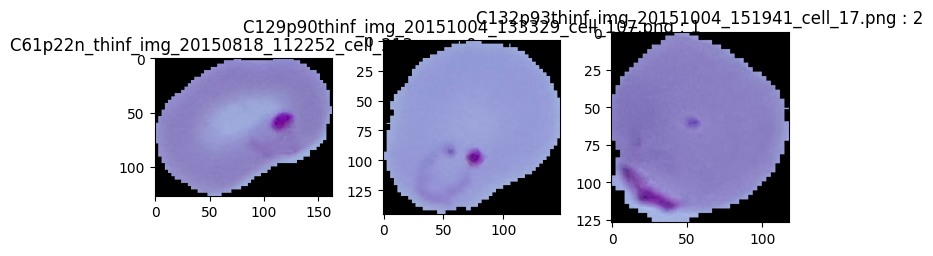

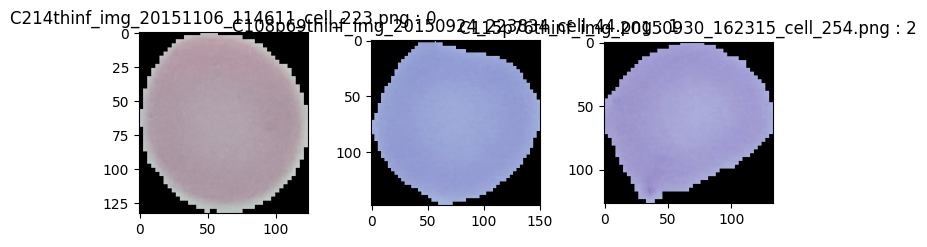

In [ ]:
#Üçer adet örnek,eğitim verisi testi
import matplotlib.pyplot as plt
import os
import cv2

def show_images(class_path, class_name, num_examples=3):
    plt.figure(figsize=(7,7))
    for i in range(num_examples):
        plt.subplot(1, num_examples, i+1)
        img_path = os.path.join(class_path, class_name[i])
        img = cv2.imread(img_path)
        plt.imshow(img)
        plt.title(f'{class_name[i].capitalize()} : {i}')  # Her elemanı büyük harfe çevir
        plt.tight_layout()
    plt.show()

parasitized_path = '/content/cell_images/Parasitized'
parasitized_images = os.listdir(parasitized_path)[:3]
show_images(parasitized_path, parasitized_images, num_examples=3)

uninfected_path = '/content/cell_images/Uninfected'
uninfected_images = os.listdir(uninfected_path)[:3]
show_images(uninfected_path, uninfected_images, num_examples=3)

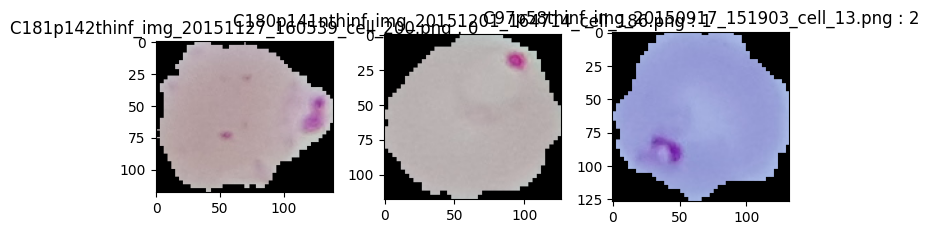

Parazitli hücre sayısı: 13780


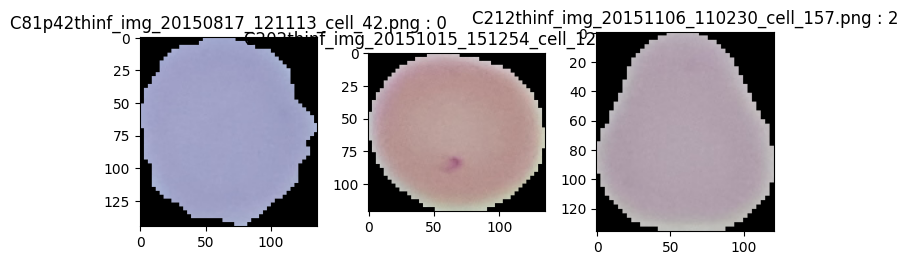

Parazitsiz hücre sayısı: 13780


In [ ]:
import matplotlib.pyplot as plt
import os
import cv2

def show_images(class_path, class_name, num_examples=3):
    plt.figure(figsize=(7,7))
    for i in range(num_examples):
        plt.subplot(1, num_examples, i+1)
        img_path = os.path.join(class_path, class_name[i])
        img = cv2.imread(img_path)
        plt.imshow(img)
        plt.title(f'{class_name[i].capitalize()} : {i}')  # Her elemanı büyük harfe çevir
        plt.tight_layout()
    plt.show()

def count_images_in_folder(folder_path):
    return len(os.listdir(folder_path))

parasitized_path = '/content/cell_images/Parasitized'
parasitized_images = os.listdir(parasitized_path)[:3]
show_images(parasitized_path, parasitized_images, num_examples=3)
print("Parazitli hücre sayısı:", count_images_in_folder(parasitized_path))

uninfected_path = '/content/cell_images/Uninfected'
uninfected_images = os.listdir(uninfected_path)[:3]
show_images(uninfected_path, uninfected_images, num_examples=3)
print("Parazitsiz hücre sayısı:", count_images_in_folder(uninfected_path))


In [ ]:
import tensorflow_datasets as tfds

In [ ]:
ds, info = tfds.load('malaria', split='train', shuffle_files=True, with_info=True)

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten

In [ ]:
#veri karıştırma
import tensorflow as tf


def augmentation_function(image, label):
    # Görüntüyü rastgele döndürme
    image = tf.image.rot90(image, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))

    # Rastgele yatay ve dikey simetri uygulama
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)

    return image, label


In [ ]:
#Yeniden boyutlandırma(resize) validation verileri için(ön işleme)
def preprocess_function(image, label):
    # Görüntüyü belirli bir boyuta yeniden boyutlandırma
    image = tf.image.resize(image, (100, 100))

    # Görüntüyü [0, 1] aralığına normalize etme
    image = image / 255.0

    return image, label

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_data = (train_data
              .map(augmentation_function)  # Veri augmentasyonu
              .map(preprocess_function)    # Veri ön işleme
              .cache()
              .shuffle(1000)
              .prefetch(buffer_size=AUTOTUNE))

val_data = (val_data
            .map(preprocess_function)  # Sadece ön işleme
            .cache()
            .prefetch(buffer_size=AUTOTUNE))

In [ ]:
#model oluşturma
from tensorflow.keras import layers, models

model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D(2, 2))

# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

# Convolutional Layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

# Flatten Layer
model.add(layers.Flatten())

# Dense Layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout for regularization

model.add(layers.Dense(1, activation='sigmoid'))

# Modelin Özetini Görüntüleme
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 10, 10, 128)      

In [ ]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics="accuracy") #  binary classification problem

In [ ]:
history = keras.callbacks.History()

In [ ]:
#modeli çalıştırma
model.fit(
    train_data,
    epochs=epochs,
    callbacks=[history],
    batch_size=default_batch_size,
    validation_data=val_data,
    shuffle=True
)

Epoch 1/30
69/69 [==============================] - 533s 7s/step - loss: 0.6564 - accuracy: 0.6167 - val_loss: 0.5749 - val_accuracy: 0.7137
Epoch 2/30
69/69 [==============================] - 485s 7s/step - loss: 0.3932 - accuracy: 0.8264 - val_loss: 0.2154 - val_accuracy: 0.9245
Epoch 3/30
69/69 [==============================] - 483s 7s/step - loss: 0.1967 - accuracy: 0.9325 - val_loss: 0.1620 - val_accuracy: 0.9483
Epoch 4/30
69/69 [==============================] - 483s 7s/step - loss: 0.1675 - accuracy: 0.9466 - val_loss: 0.1504 - val_accuracy: 0.9506
Epoch 5/30
69/69 [==============================] - 499s 7s/step - loss: 0.1497 - accuracy: 0.9517 - val_loss: 0.1498 - val_accuracy: 0.9512
Epoch 6/30
69/69 [==============================] - 497s 7s/step - loss: 0.1366 - accuracy: 0.9559 - val_loss: 0.1394 - val_accuracy: 0.9541
Epoch 7/30
69/69 [==============================] - 482s 7s/step - loss: 0.1258 - accuracy: 0.9584 - val_loss: 0.1412 - val_accuracy: 0.9516
Epoch 8/30
69

In [ ]:
#epochs değerleri df tablosu
df = pd.DataFrame.from_dict(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.656418,0.616683,0.574923,0.713664
1,0.393224,0.826416,0.215382,0.924515
2,0.196654,0.932462,0.161972,0.948285
3,0.167514,0.946569,0.150400,0.950644
4,0.149745,0.951694,0.149768,0.951189
5,0.136615,0.955867,0.139449,0.954092
6,0.125802,0.958407,0.141202,0.951551
7,0.120488,0.959768,0.150071,0.952459
8,0.106819,0.963623,0.140940,0.955181
9,0.095217,0.966707,0.141308,0.952640


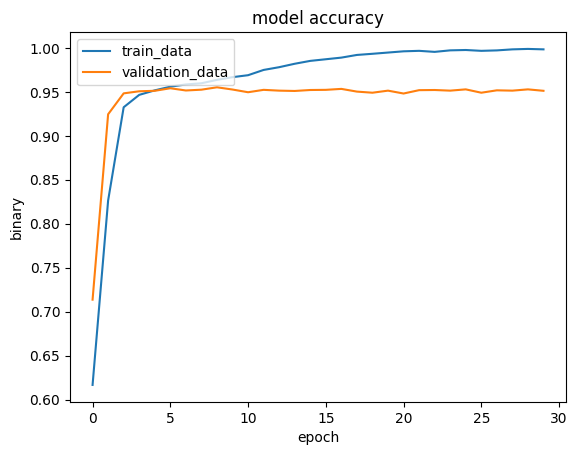

In [ ]:
3plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('binary')
plt.xlabel('epoch')
plt.legend(['train_data', 'validation_data'], loc='upper left')
plt.show()
print("")
